In [1]:
#reload source files automatically
%load_ext autoreload
%autoreload 2

In [137]:
import sklearn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
import sklearn.neighbors
import sklearn.metrics
from __future__ import print_function

from lime_time_series import *

In [170]:
# read dataset
train = pd.read_csv('time_series/Trace_TRAIN', header=None)
test = pd.read_csv('time_series/Trace_TEST', header=None)
#train = train[train[0]>2].reset_index().drop(['index'], axis=1)
#test = test[test[0]>2].reset_index().drop(['index'], axis=1)

Y_columns = [0]
Y_train = train[Y_columns]
X_train = train.drop(Y_columns, axis=1)
Y_test = test[Y_columns]
X_test = test.drop(Y_columns, axis=1)

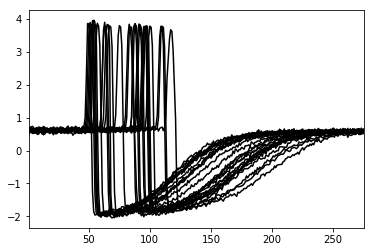

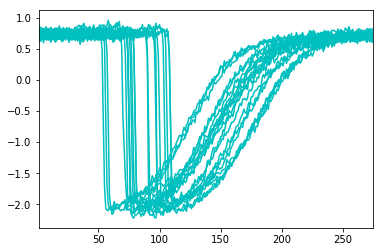

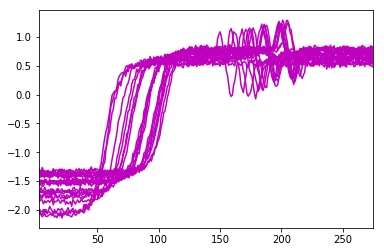

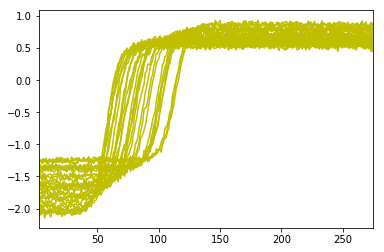

In [171]:
train[train[0]==1].transpose()[1:].plot(legend=False, color='k')
plt.show()
train[train[0]==2].transpose()[1:].plot(legend=False, color='c')
plt.show()
train[train[0]==3].transpose()[2:].plot(legend=False, color='m')
plt.show()
train[train[0]==4].transpose()[2:].plot(legend=False, color='y')
plt.show()
#test[test[0]==1].transpose()[1:].plot(legend=False, color='y')
#plt.show()

In [172]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [173]:
def DTWDistance_windowed(s1, s2):
    DTW={}

    w = max(10, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [174]:
kNN = sklearn.neighbors.KNeighborsClassifier(metric=DTWDistance_windowed)
kNN.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function DTWDistance_windowed at 0x7fed897582f0>,
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [175]:
pred = kNN.predict(X_test[0:10])

In [176]:
pred

array([3, 1, 3, 2, 1, 3, 2, 2, 2, 4])

In [177]:
sklearn.metrics.accuracy_score(Y_test[0:10].values.ravel(), pred)

1.0

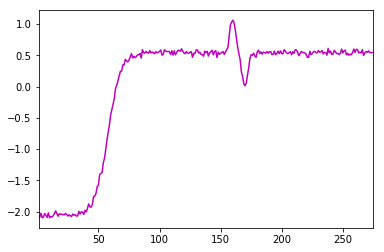

Series id: 2
Probabilities:  [[ 0.   0.   0.8  0.2]]
True class: 3


In [471]:
plt.clf()
test_series_index = 2
instance_to_predict = X_test.iloc[test_series_index]
instance_to_predict.plot(legend=False, color='m')
plt.show()
plt.savefig('trace_explain_lime_{}.png'.format(test_series_index),dpi=400)
print('Series id: %d' % test_series_index)
print('Probabilities: ', kNN.predict_proba([X_test.iloc[test_series_index]]))
print('True class: %s' % Y_test.iloc[test_series_index, 0])

In [472]:
explainer = LimeTimeSeriesExplainer()
num_ranges = 10
num_samples = 10 * num_ranges

FEATURE 0:


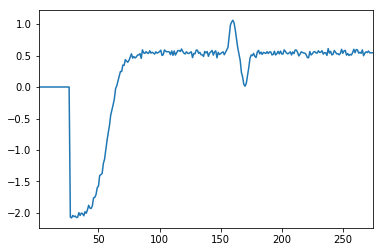

FEATURE 1:


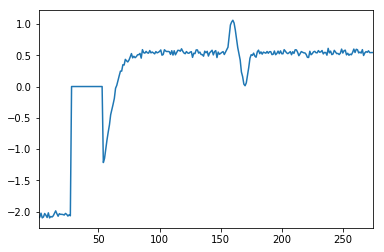

FEATURE 2:


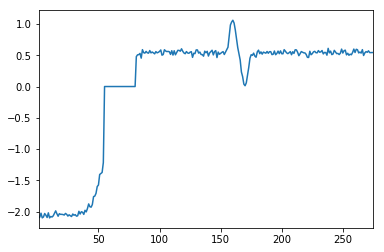

FEATURE 3:


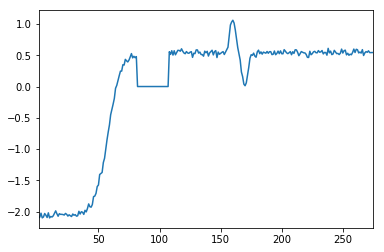

FEATURE 4:


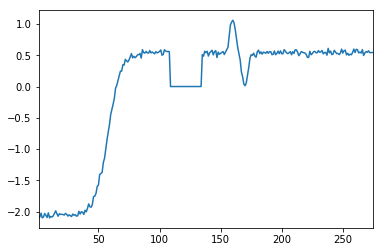

FEATURE 5:


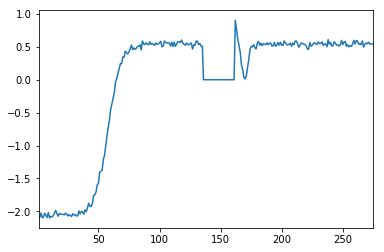

FEATURE 6:


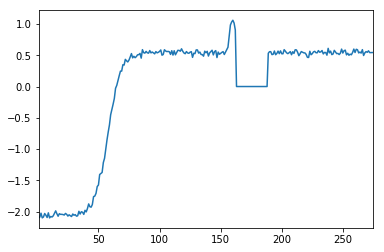

FEATURE 7:


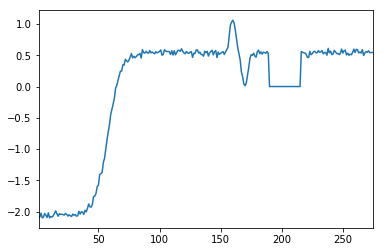

FEATURE 8:


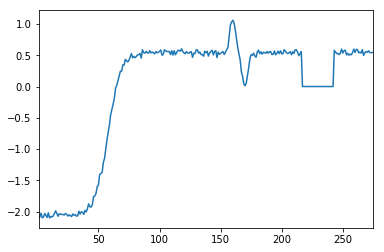

FEATURE 9:


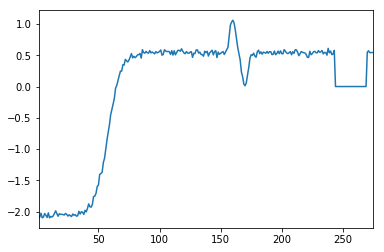

[4 6 4 3 4 3 1 5 1 8 7 4 7 2 5 8 5 8 9 9 8 8 1 5 9 6 7 8 9 7 4 8 5 1 5 5 5
 2 1 6 7 1 6 9 1 1 1 6 1 1 3 2 2 4 2 1 2 4 1 7 2 7 4 6 7 6 9 4 9 8 8 5 7 6
 6 3 4 4 4 9 2 7 5 8 5 9 9 9 1 6 6 6 4 8 5 4 7 9 2]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  1.  1.  0.  1.  1.  1.  1.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.  1.  1.  0.]
 [ 0.  1.  0.  1.  1.  1.  0.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  1.  0.  0.  1.]
 [ 1.  1.  0.  0.  1.  1.  1.  0.  0.  1.]
 [ 1.  1.  0.  1.  1.  0.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.]
 [ 1.  0.  1.  1.  0.  0.  1.  1.  0.  0.]
 [ 1.  0.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  0.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1.  0.  1.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1

In [473]:
exp = explainer.explain_instance(X_test.iloc[[test_series_index]], kNN.predict_proba, top_labels=2, num_features=num_ranges, num_ranges=num_ranges, num_samples=num_samples)

In [482]:
features = exp.as_map()[3]
features.sort(key=lambda x: x[0])
print(features)

[(0, 0.05668534498867147), (1, -0.020602596524346407), (2, -0.050659607407738998), (3, 0.049082695413178279), (4, 0.047782087280769506), (5, 0.075590937096021243), (6, 0.21818505363753996), (7, 0.058435250496946867), (8, 0.01609506050683332), (9, -0.011634672640404221)]


In [483]:
def visualize_range(time_series, num_ranges, feature_ranking):
        #tmp = time_series.copy().iloc[1]
        plt.clf()
        tmp = time_series.copy()
        
        y = tmp.values
        x = tmp.index.values
        
        
        color_list = []
        linewidth_list = []
        print(math.floor(len(x)/num_ranges))
        
        for feature in feature_ranking:
            linewidth_list.extend([feature[1]*5]* math.floor(len(x)/num_ranges))
            if feature[1] < 0:
                color_list.append('r')
            else:
                color_list.append('g')

        cmap = ListedColormap(color_list)
        
        boundary_list = [1]
        
        for feature in feature_ranking:
            boundary_list.append(1 + (feature[0]+1) *  math.floor(len(x)/num_ranges))
            
        norm = BoundaryNorm(boundary_list, cmap.N)

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        print(segments)
        print(boundary_list)
        lc = LineCollection(segments, cmap=cmap, norm=norm, linewidths=linewidth_list)
        lc.set_array(x)
        
        fig1 = plt.figure()
        plt.gca().add_collection(lc)
        plt.xlim(x.min(), x.max())
        plt.ylim(y.min()-1, y.max()+1)
          
        plt.savefig('fiv_traceclass{}_{}.png'.format(Y_test.iloc[test_series_index, 0], num_samples), dpi=400)

In [484]:
visualize_range(instance_to_predict, num_ranges, features)

27
[[[   1.        -2.1008 ]
  [   2.        -2.0882 ]]

 [[   2.        -2.0882 ]
  [   3.        -2.0251 ]]

 [[   3.        -2.0251 ]
  [   4.        -2.1002 ]]

 ..., 
 [[ 272.         0.54214]
  [ 273.         0.54294]]

 [[ 273.         0.54294]
  [ 274.         0.54375]]

 [[ 274.         0.54375]
  [ 275.         0.54387]]]
[1, 28, 55, 82, 109, 136, 163, 190, 217, 244, 271]
